In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.shape

(210, 14)

In [4]:
train_df.sample(5)

,ID,Age,Weight_kg,PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
173,173,Less than 20,56.0,No,No,No,No,No,No,6-8 Times a Week,No Exercise,Not Applicable,6-8 hours,Not at All
87,87,20-25,50.0,No,No,No,No,No,No,Rarely,No Exercise,Less than 30 minutes,6-8 hours,Somewhat
126,126,15-20,48.0,No,Yes,No,No,No,No,6-8 Times a Week,No Exercise,Not Applicable,6-8 hours,Somewhat
49,49,20-25,53.0,No,Yes,No,No,No,No,3-4 Times a Week,"Flexibility and balance (e.g., yoga, pilates)",Less than 30 minutes,9-12 hours,Somewhat
8,8,20-25,71.0,Yes,Yes,No,No,No,No,Never,No Exercise,Not Applicable,Less than 6 hours,Not at All


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     210 non-null    int64  
 1   Age                    209 non-null    object 
 2   Weight_kg              208 non-null    float64
 3   PCOS                   210 non-null    object 
 4   Hormonal_Imbalance     208 non-null    object 
 5   Hyperandrogenism       207 non-null    object 
 6   Hirsutism              205 non-null    object 
 7   Conception_Difficulty  209 non-null    object 
 8   Insulin_Resistance     209 non-null    object 
 9   Exercise_Frequency     208 non-null    object 
 10  Exercise_Type          208 non-null    object 
 11  Exercise_Duration      208 non-null    object 
 12  Sleep_Hours            208 non-null    object 
 13  Exercise_Benefit       209 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 23.1+ KB

In [6]:
train_df = train_df.drop(columns=['ID'])

In [7]:
train_df.isna().sum()

Age                      1
Weight_kg                2
PCOS                     0
Hormonal_Imbalance       2
Hyperandrogenism         3
Hirsutism                5
Conception_Difficulty    1
Insulin_Resistance       1
Exercise_Frequency       2
Exercise_Type            2
Exercise_Duration        2
Sleep_Hours              2
Exercise_Benefit         1
dtype: int64

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight_kg', ylabel='Count'>

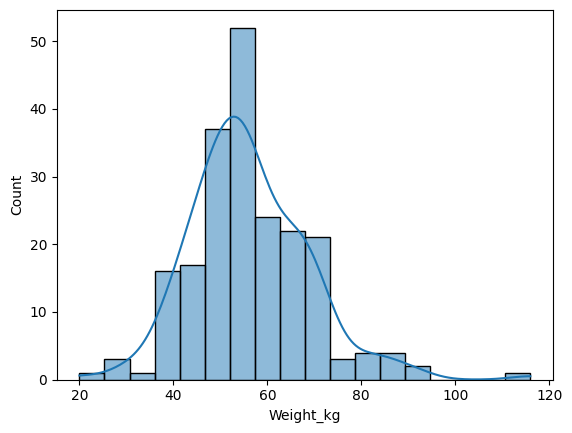

In [8]:
sns.histplot(train_df['Weight_kg'], kde=True)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight_kg', ylabel='Count'>

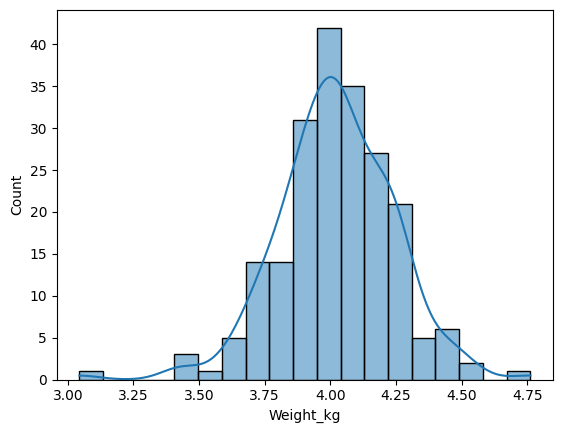

In [9]:
sns.histplot(np.log1p(train_df['Weight_kg']), kde=True)

In [10]:
train_df['log_Weight_kg'] = np.log1p(train_df['Weight_kg'])

In [11]:
new_train_df = train_df.drop(columns='Weight_kg')

In [12]:
new_train_df

,Age,PCOS,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit,log_Weight_kg
0,20-25,No,No,No,No,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,Somewhat,4.174387
1,15-20,No,No,No,No,No,No,6-8 Times a Week,No Exercise,Less than 30 minutes,6-8 hours,Somewhat,4.025352
2,15-20,No,No,No,Yes,No,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Somewhat,4.521789
3,15-20,No,No,No,No,No,No,6-8 Times a Week,"Cardio (e.g., running, cycling, swimming)",45 minutes,6-8 hours,Not at All,4.043051
4,15-20,No,Yes,No,No,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Not Much,3.871201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,20-25,No,No,No,No,No,No,Rarely,No Exercise,Not Applicable,Less than 6 hours,Somewhat,4.060443
206,Less than 20,No,Yes,Yes,Yes,No,No,Rarely,No Exercise,Not Applicable,6-8 hours,Somewhat,4.000034
207,30-35,No,No,No,No,No,No,1-2 Times a Week,Cardio (e.g.,30 minutes,6-8 hours,Somewhat,3.433987
208,20-25,No,No,No,Yes,No,No,1-2 Times a Week,No Exercise,Less than 30 minutes,Less than 6 hours,Somewhat,4.189655


In [13]:
cat_cols = new_train_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Age', 'PCOS', 'Hormonal_Imbalance', 'Hyperandrogenism', 'Hirsutism',
       'Conception_Difficulty', 'Insulin_Resistance', 'Exercise_Frequency',
       'Exercise_Type', 'Exercise_Duration', 'Sleep_Hours',
       'Exercise_Benefit'],
      dtype='object')

In [14]:
def show_count(col):
    plt.figure(figsize=(6, 6))
    sns.countplot(x=new_train_df[col])
    plt.title(f'Frequency of {col}')
    plt.show()

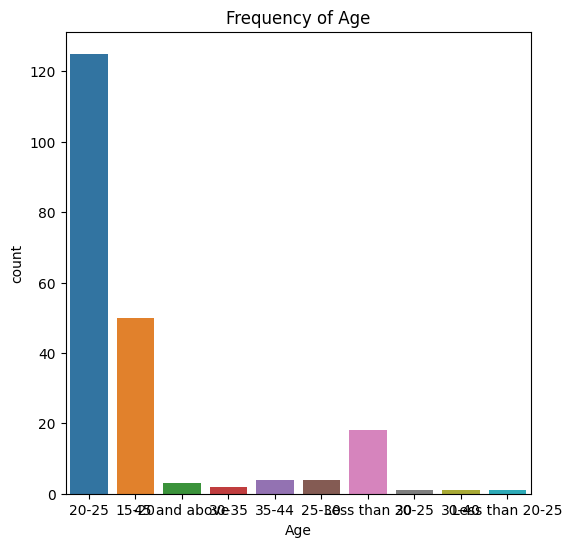

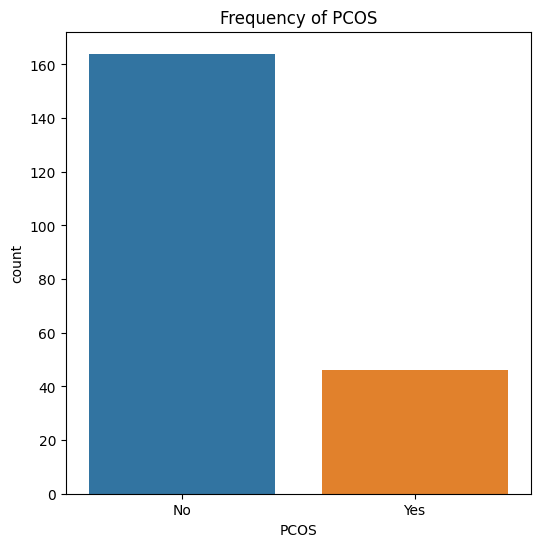

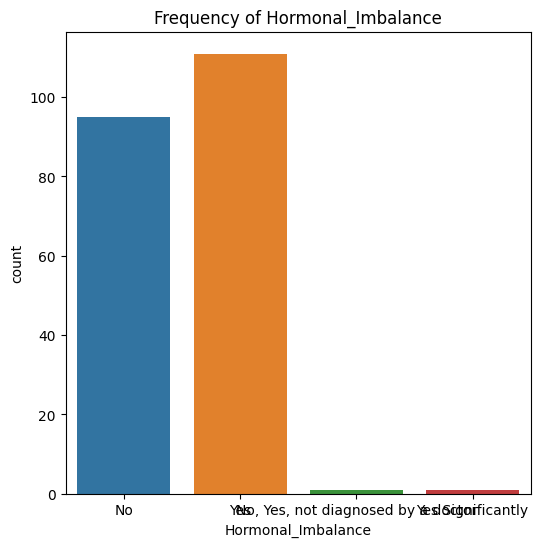

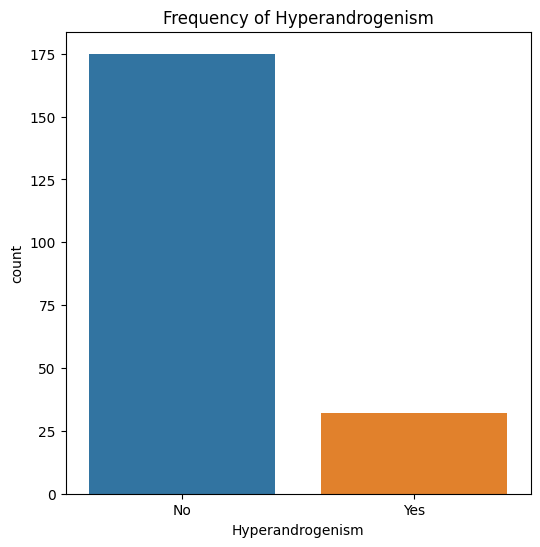

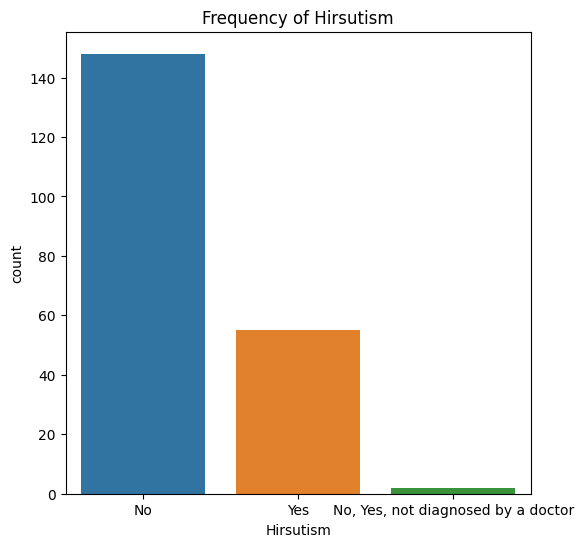

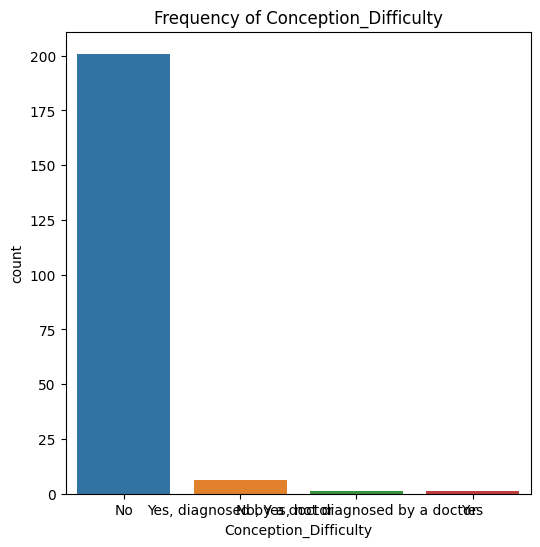

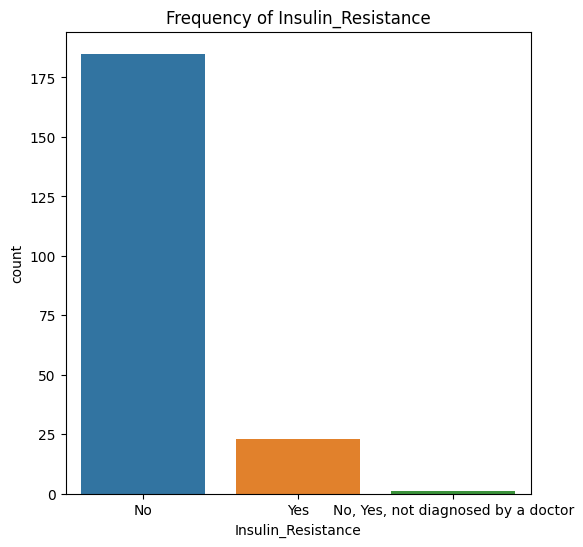

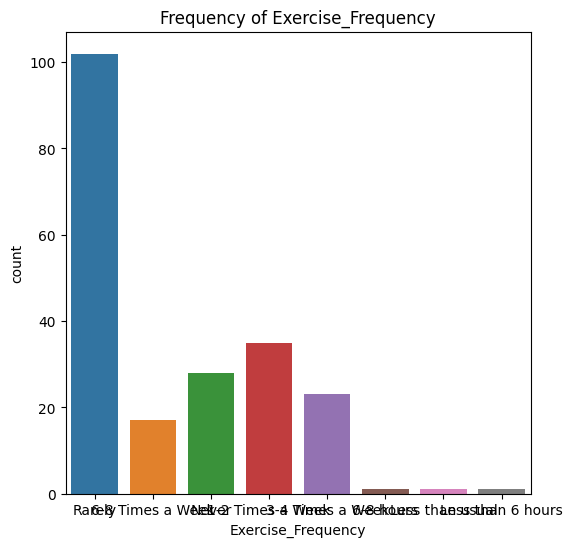

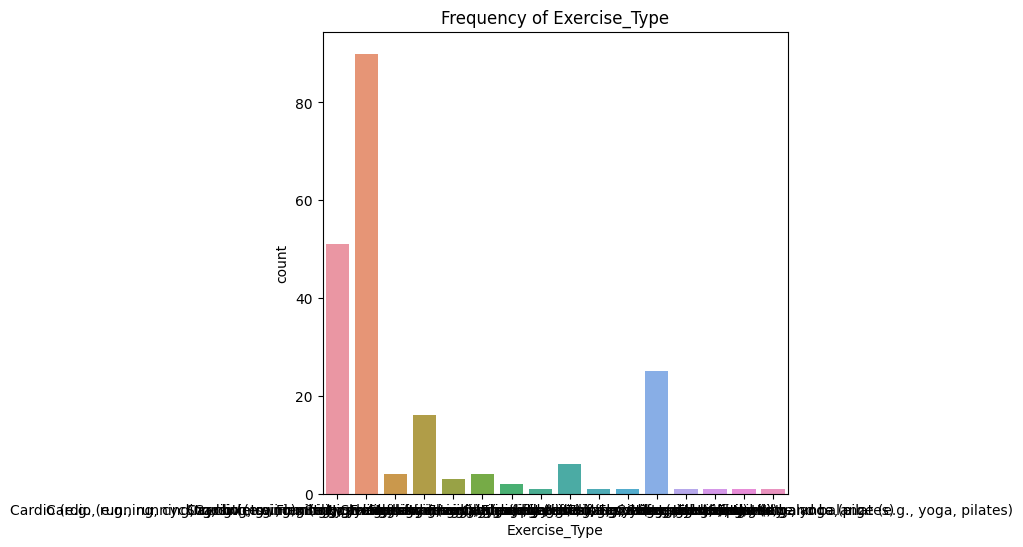

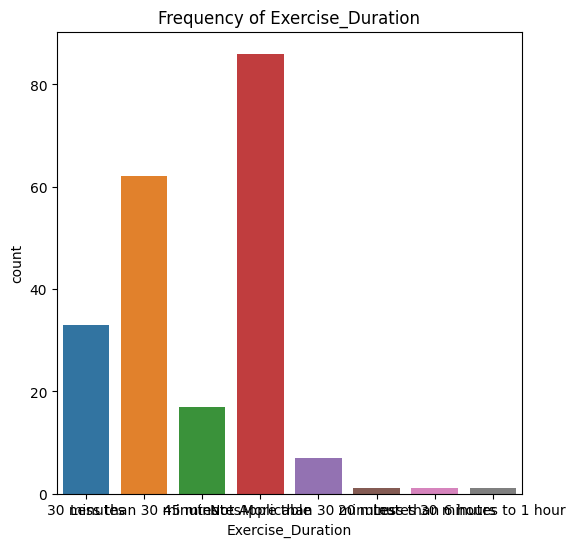

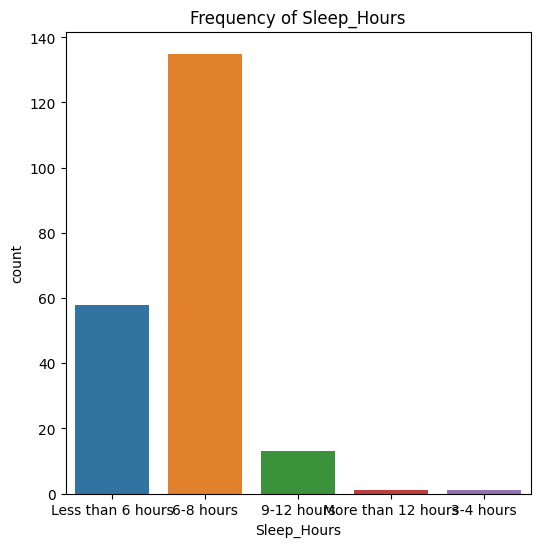

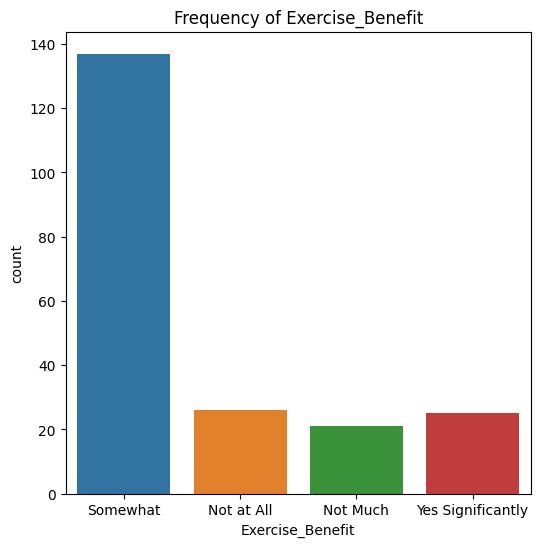

In [15]:
for col in cat_cols:
    show_count(col)

In [16]:
for col in cat_cols:
    print(new_train_df[col].value_counts(), end="\n\n")

Age
20-25              125
15-20               50
Less than 20        18
35-44                4
25-30                4
45 and above         3
30-35                2
30-25                1
30-40                1
Less than 20-25      1
Name: count, dtype: int64

PCOS
No     164
Yes     46
Name: count, dtype: int64

Hormonal_Imbalance
Yes                                   111
No                                     95
No, Yes, not diagnosed by a doctor      1
Yes Significantly                       1
Name: count, dtype: int64

Hyperandrogenism
No     175
Yes     32
Name: count, dtype: int64

Hirsutism
No                                    148
Yes                                    55
No, Yes, not diagnosed by a doctor      2
Name: count, dtype: int64

Conception_Difficulty
No                                    201
Yes, diagnosed by a doctor              6
No, Yes, not diagnosed by a doctor      1
Yes                                     1
Name: count, dtype: int64

Insulin_Resistance
No    

In [17]:
new_train_df.isna().sum()

Age                      1
PCOS                     0
Hormonal_Imbalance       2
Hyperandrogenism         3
Hirsutism                5
Conception_Difficulty    1
Insulin_Resistance       1
Exercise_Frequency       2
Exercise_Type            2
Exercise_Duration        2
Sleep_Hours              2
Exercise_Benefit         1
log_Weight_kg            2
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier

In [19]:
label = LabelEncoder()

In [20]:
label.fit(new_train_df['PCOS'])

LabelEncoder()

In [21]:
X = new_train_df.drop(columns=['PCOS'])
y = label.transform(new_train_df['PCOS'])

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [24]:
num_pipe = Pipeline(
    [
        ('impute', SimpleImputer(strategy='mean'))
    ]
)

In [25]:
cat_pipe = Pipeline(
    [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

In [26]:
for idx, col in enumerate(X_train.columns):
    print(idx, ':', col, '---', X_train[col].dtype)

0 : Age --- object
1 : Hormonal_Imbalance --- object
2 : Hyperandrogenism --- object
3 : Hirsutism --- object
4 : Conception_Difficulty --- object
5 : Insulin_Resistance --- object
6 : Exercise_Frequency --- object
7 : Exercise_Type --- object
8 : Exercise_Duration --- object
9 : Sleep_Hours --- object
10 : Exercise_Benefit --- object
11 : log_Weight_kg --- float64


In [27]:
preprocessor = ColumnTransformer(
    [
        ('num', num_pipe, [11]),
        ('cat', cat_pipe, list(range(0, 11)))
    ]
)

In [28]:
log_reg = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', LogisticRegression())
    ]
)

In [29]:
log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  [11]),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10])])),
                ('model', LogisticRegression())])

In [30]:
y_pred_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_pred_log_reg

array([0.74015387, 0.59499309, 0.02616978, 0.09584207, 0.51767441,
       0.11595226, 0.42890848, 0.03426245, 0.06479764, 0.09025452,
       0.03880843, 0.0234904 , 0.01334613, 0.07969214, 0.23761184,
       0.80834329, 0.36826473, 0.16953012, 0.20376996, 0.19712862,
       0.09853909])

In [31]:
roc_auc_score(y_test, y_pred_log_reg)

0.8557692307692307

In [32]:
test = pd.read_csv('test.csv')

In [33]:
test

,ID,Age,Weight_kg,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Exercise_Benefit
0,0,20-25,54.0,No,No,No,No,No,Rarely,No Exercise,Less than 30 minutes,6-8 hours,Somewhat
1,1,20-25,65.0,Yes,No,No,No,No,3-4 Times a Week,No Exercise,Not Applicable,6-8 hours,Somewhat
2,2,20-25,64.0,Yes,No,No,No,No,6-8 Times a Week,Cardio (e.g.,Not Applicable,6-8 hours,Somewhat
3,3,Less than 20,57.0,Yes,No,Yes,No,Yes,Rarely,No Exercise,6-8 hours,6-8 hours,Somewhat
4,4,Less than 20,6.0,Yes,No,Yes,No,No,Rarely,Cardio (e.g.,30 minutes,6-8 hours,Somewhat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,20-25,52.0,Yes,No,No,No,No,Rarely,Cardio (e.g.,Less than 30 minutes,6-8 hours,Somewhat
141,141,20-25,67.0,No,No,No,No,No,Rarely,Strength training (e.g.,Less than 30 minutes,6-8 hours,Not at All
142,142,20-25,55.0,Yes,Yes,Yes,Yes,No,Rarely,Cardio (e.g.,Less than 20 minutes,6-8 hours,Yes Significantly
143,143,Less than 20,49.0,No,No,Yes,No,No,1/2 Times a Week,Cardio (e.g.,Less than 30 minutes,6-8 hours,Not Much


In [34]:
ids = test['ID']

In [35]:
test.drop(columns=['ID'], inplace=True)

In [36]:
test['log_Weight_kg'] = np.log1p(test['Weight_kg'])

In [37]:
test.drop(columns=['Weight_kg'], inplace=True)

In [38]:
test.shape

(145, 12)

In [39]:
test_pred_log_reg = log_reg.predict_proba(test)[:, 1]

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 4, 5, 6, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [40]:
result_log_reg = pd.DataFrame({'ID': ids, 'PCOS': test_pred_log_reg})
result_log_reg

,ID,PCOS
0,0,0.030718
1,1,0.193036
2,2,0.168209
3,3,0.411992
4,4,0.075466
...,...,...
140,140,0.134886
141,141,0.032720
142,142,0.559635
143,143,0.054310


In [41]:
svc_pipe = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', SVC(probability=True))
    ]
)

svc_pipe.fit(X_train, y_train)

y_pred_svc = svc_pipe.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_svc))

0.8653846153846154


In [42]:
test_pred_svc = svc_pipe.predict_proba(test)[:, 1]
result_svc = pd.DataFrame({'ID': ids, 'PCOS': test_pred_svc})
result_svc.to_csv('Support_Vector_Classifier.csv', index=False)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 4, 5, 6, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [43]:
kneighbors = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', KNeighborsClassifier())
    ]
)

kneighbors.fit(X_train, y_train)

y_pred_kneighbors = kneighbors.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_kneighbors))

0.6153846153846153


In [44]:
decision_tree = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', DecisionTreeClassifier())
    ]
)

decision_tree.fit(X_train, y_train)

y_pred_decision_tree = decision_tree.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_decision_tree))

0.5865384615384616


In [45]:
rf = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier())
    ]
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_rf))

0.8076923076923077


In [46]:
ada = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', AdaBoostClassifier())
    ]
)

ada.fit(X_train, y_train)

y_pred_ada = ada.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_ada))

0.8509615384615384


In [47]:
gradient_boosting = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', GradientBoostingClassifier())
    ]
)

gradient_boosting.fit(X_train, y_train)

y_pred_gb = gradient_boosting.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_gb))

0.8365384615384615


In [48]:
log_reg.fit(X, y)
svc_pipe.fit(X, y)
rf.fit(X, y)
ada.fit(X, y)
gradient_boosting.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  [11]),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10])])),
                ('model', GradientBoostingClassifier())])

In [49]:
test_pred_log_reg = log_reg.predict_proba(test)[:, 1]
test_pred_svc = svc_pipe.predict_proba(test)[:, 1]
test_pred_rf = rf.predict_proba(test)[:, 1]
test_pred_ada = ada.predict_proba(test)[:, 1]
test_pred_gb = gradient_boosting.predict_proba(test)[:, 1]

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 4, 5, 6, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 4, 5, 6, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 4, 5, 6, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 4, 5, 6, 7, 8, 9] during tr

In [50]:
result_log_reg = pd.DataFrame({'ID': ids, 'PCOS': test_pred_log_reg})
result_svc = pd.DataFrame({'ID': ids, 'PCOS': test_pred_svc})
result_rf = pd.DataFrame({'ID': ids, 'PCOS': test_pred_rf})
result_ada = pd.DataFrame({'ID': ids, 'PCOS': test_pred_ada})
result_gb = pd.DataFrame({'ID': ids, 'PCOS': test_pred_gb})

In [109]:
result_log_reg.to_csv('Logistic_Regression_on_whole.csv', index=False)
result_svc.to_csv('Support_Vector_Classifier_on_whole.csv', index=False)
result_rf.to_csv('Random_Forest_Classifier_on_whole.csv', index=False)
result_ada.to_csv('AdaBoost_Classifier_on_whole.csv', index=False)
result_gb.to_csv('Gradient_Boosting_Classifier_on_whole.csv', index=False)

In [57]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustomXGBClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, **kwargs):
        self.model = XGBClassifier(**kwargs)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)
    
    def predict_proba(self, X):
        return self.model.predict_proba(X)

In [58]:
xgb = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', CustomXGBClassifier())
    ]
)

xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  [11]),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10])])),
                ('model', CustomXGBClassifier())])

In [59]:
y_pred_xgb = xgb.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_xgb))

0.8461538461538463


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [60]:
xgb.fit(X, y)
test_pred_xgb = xgb.predict_proba(test)[:, 1]
result_xgb = pd.DataFrame({'ID': ids, 'PCOS': test_pred_xgb})
result_xgb.to_csv('EXtreme_Gradient_Boosting_Classifier_on_whole.csv', index=False)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 4, 5, 6, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
